## Brain Stroke Model
Author: Annbellah Nduta Mbungu
 


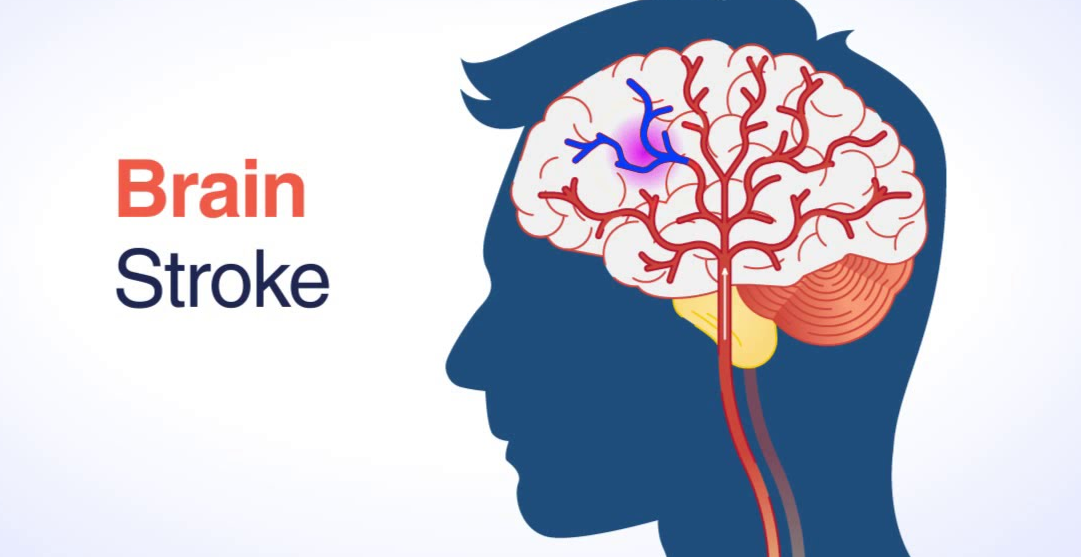

## Business Understanding
The title of this dataset is called "Brain Stroke dataset" from kaggle.com

Number of records: 4981
Number of columns: 11
Target variable: churn

# Stakeholder
Healthcare Providers.Including hospitals, clinics, and individual healthcare practitioners who will use the predictive model to identify and manage patients at high risk of stroke.

# Importance of the Project
Strokes are a major cause of morbidity and mortality worldwide, leading to significant long-term disabilities and healthcare expenses. Early identification and intervention for high-risk individuals can significantly reduce the incidence of strokes and the severity of their consequences. This project aims to provide a data-driven approach to enhance preventive healthcare measures.

# Project Objective
The primary goal of this project is to develop a predictive model that can accurately identify individuals at high risk of having a stroke based on various health and demographic factors. By leveraging this model, healthcare providers can proactively manage and mitigate stroke risks, ultimately improving patient outcomes and reducing healthcare costs associated with stroke-related treatments and complications.


# Models
Baseline model: Logistic regression
Model 2: Decision tree
Model 3: Knn
Model 4: Random forest

# Evaluation Metric
I have decided to use Recall as the evaluation metric for this project. Recall is calculated by dividing the number of true positives by the sum of true positives and false negatives. It measures the proportion of actual positive instances that are correctly identified. I selected this metric because our goal is to identify as many positive instances as possible, making it the most suitable choice when dealing with imbalanced data.

### Import Libraries
Firstly, we import the necessary libraries to be used in this project

In [93]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

## Loading the Data 
The next step is to extract the data and put in a pandas dataframe, and to print the first 5 rows to see if the data was imported correctly.

In [94]:
stroke_df = pd.read_csv('brain_stroke.csv')
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Exploring and Cleaning of the data
Below I am exploring the data, and checking what the data types of each columns, the descriptive statistics and finally I will check for any duplicates and missing data.

In [95]:
stroke_df.shape

(4981, 11)

In [96]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [97]:
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [98]:
stroke_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [99]:
stroke_df.duplicated().sum()

0

In [100]:
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [101]:
stroke_df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

The dataset has no null values or duplicates but its imbalanced which we will deal with later. The columns on gender and smoking status need to be encoded which I will also do later.

### Data Visualization

We will start with checking the relationship between the dependent variable and the numerical variables.

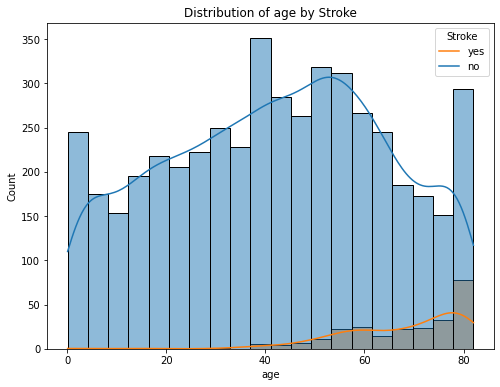

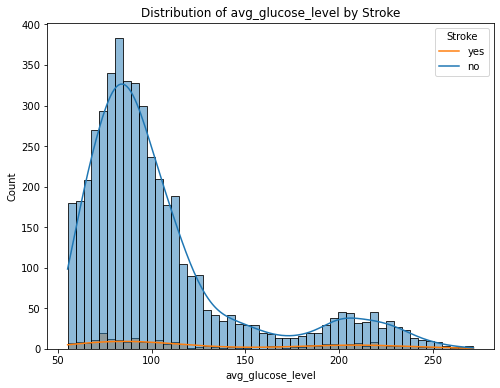

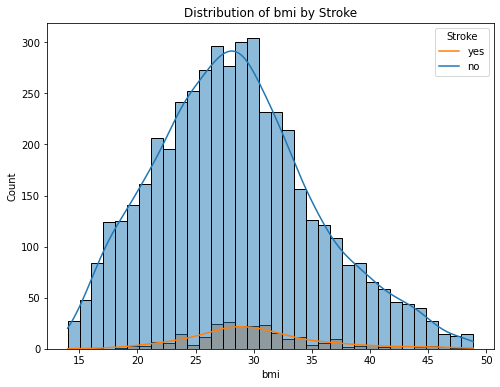

In [102]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
stroke_df_num = stroke_df[numerical_columns + ['stroke']]

# Plot histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=stroke_df_num, x=col, hue='stroke', kde=True)
    plt.title(f'Distribution of {col} by Stroke')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Stroke', labels=['yes', 'no'])
    plt.show()


From the above visualizations, its evident that people from the age between 60-80, people with bmis between 26-32 are more likely to get a stroke.

### Categorical Variables 
We will check how the categorical variables relate with the dependent variable

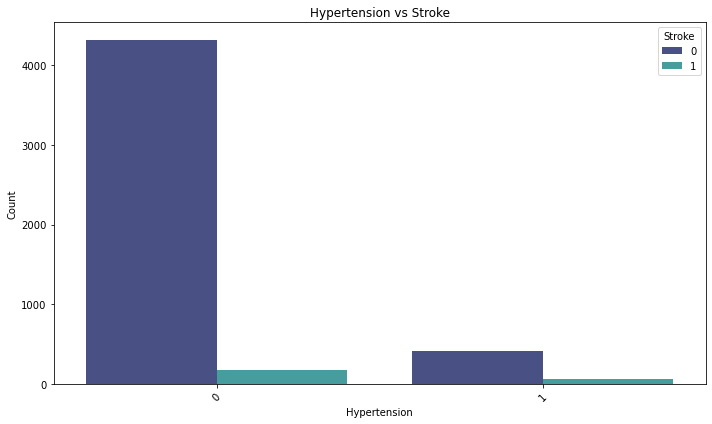

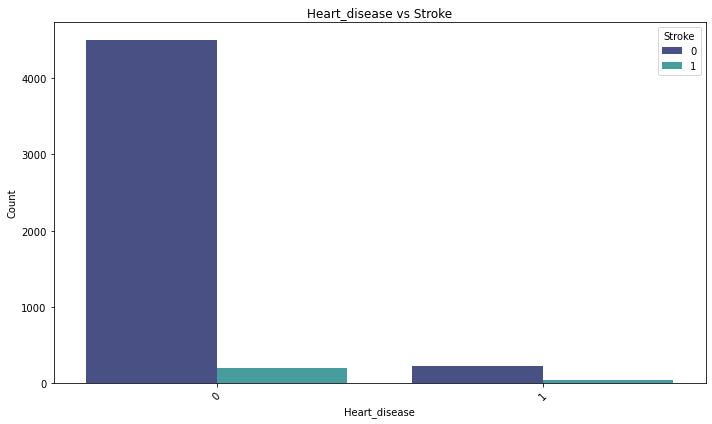

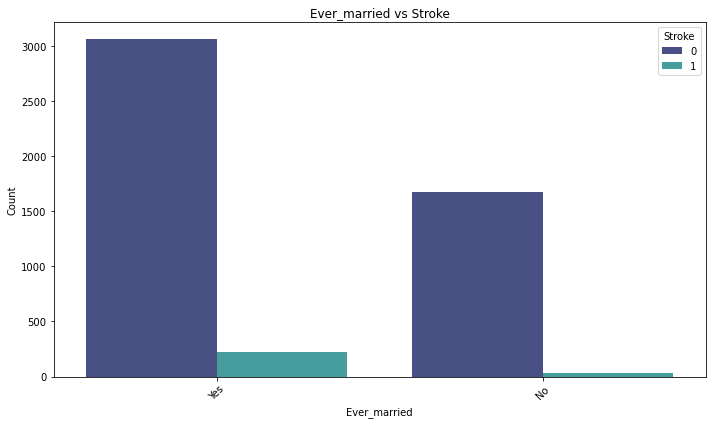

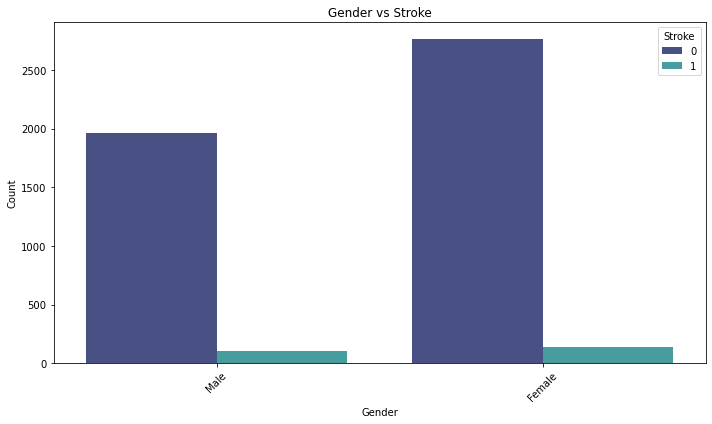

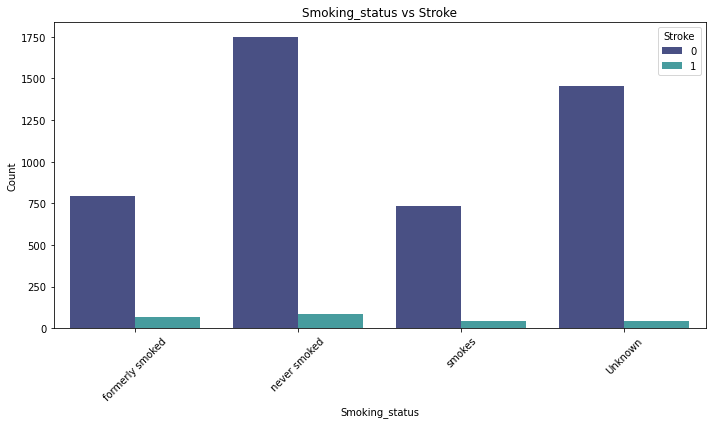

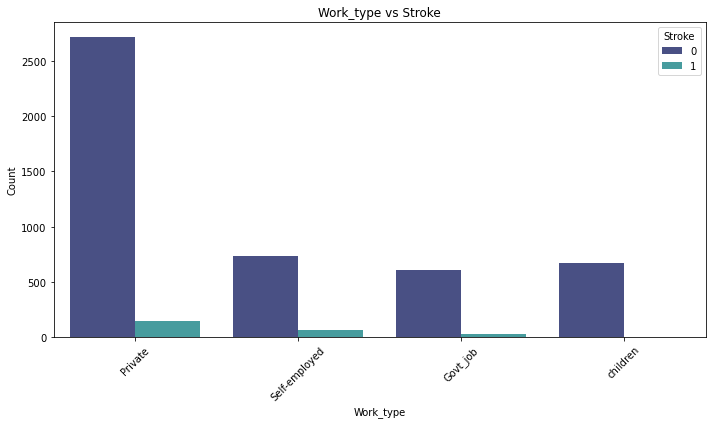

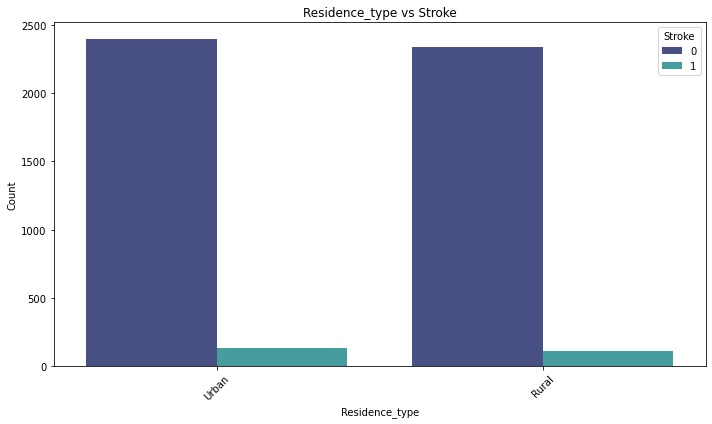

In [103]:
categorical_columns = ['hypertension', 'heart_disease', 'ever_married', 'gender', 'smoking_status', 'work_type', 'Residence_type']



# Loop through each categorical column and create a count plot with specified colors
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='stroke', data=stroke_df, palette='mako')
    plt.title(f'{column.capitalize()} vs Stroke')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Stroke', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [104]:
stroke_df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


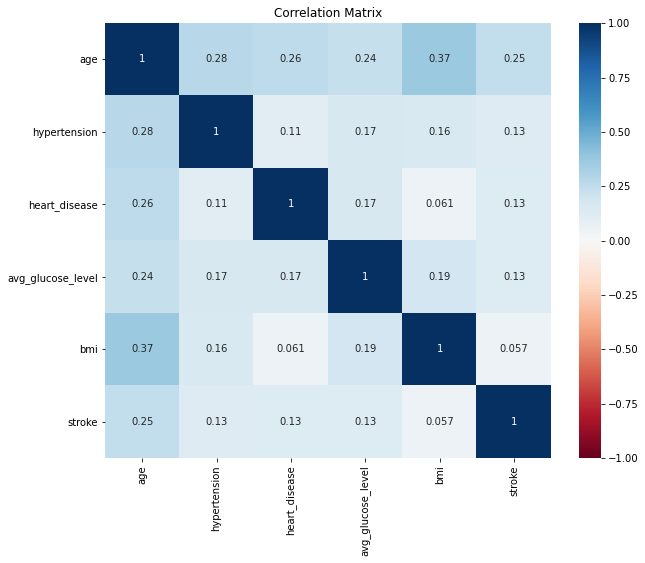

In [105]:
correlation_matrix = stroke_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0, vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [106]:
#Onehot Encoding for the smoking status column
stroke_df = pd.get_dummies(stroke_df, columns=['smoking_status'])

In [107]:
# Turning the categorical columns into numerical columns
label_encoder = LabelEncoder()
stroke_df['ever_married'] = label_encoder.fit_transform(stroke_df['ever_married'])
stroke_df['gender'] = label_encoder.fit_transform(stroke_df['gender'])

Now I will drop the variables that don't seem relevant 

In [108]:
stroke_df=stroke_df.drop(['work_type'],axis=1)
stroke_df=stroke_df.drop(['Residence_type'],axis=1)

In [109]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,1,0,0
1,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0
2,0,49.0,0,0,1,171.23,34.4,1,0,0,0,1
3,0,79.0,1,0,1,174.12,24.0,1,0,0,1,0
4,1,81.0,0,0,1,186.21,29.0,1,0,1,0,0


### Train Test Split

In [110]:
X = stroke_df.drop(['stroke'],axis=1)
y = stroke_df['stroke']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

In [112]:
mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)

### Baseline Model
##### Logistic Regression
I will be using the logistic regression as my baseline model.

In [113]:
#Initialize the logistic regression
logreg = LogisticRegression()

In [114]:
#fit the model
logreg.fit(X_train, y_train)

LogisticRegression()

In [115]:
#Get predictions
y_pred_log_train = logreg.predict(X_train)
y_pred_log_test = logreg.predict(X_test)

Classification report of the training data

In [116]:
display(confusion_matrix(y_train, y_pred_log_train))
print(classification_report(y_train, y_pred_log_train))

array([[3798,    0],
       [ 186,    0]], dtype=int64)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3798
           1       0.00      0.00      0.00       186

    accuracy                           0.95      3984
   macro avg       0.48      0.50      0.49      3984
weighted avg       0.91      0.95      0.93      3984



c:\Users\NDUTA\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for the testing data

In [117]:
display(confusion_matrix(y_test, y_pred_log_test))
print(classification_report(y_test, y_pred_log_test))

array([[935,   0],
       [ 62,   0]], dtype=int64)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       935
           1       0.00      0.00      0.00        62

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.48       997
weighted avg       0.88      0.94      0.91       997



After running the first classification report on the training data, our baseline model had a recall score of 0%. This is not good and leaves a lot of room for improvement.

I'll try balancing the dataset to see the impact but before splitting for indexing purposes

In [118]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = stroke_df[stroke_df.stroke == 0]
df_minority = stroke_df[stroke_df.stroke == 1]

# Undersample the majority class
df_majority_undersampled = resample(df_majority, 
                                    replace=False,    # sample without replacement
                                    n_samples=248,    # to match minority class
                                    random_state=42)  # reproducible results

# Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

# Display the new class counts
print(df_undersampled.stroke.value_counts())

1    248
0    248
Name: stroke, dtype: int64


In [119]:
df_undersampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 1798
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          496 non-null    int32  
 1   age                             496 non-null    float64
 2   hypertension                    496 non-null    int64  
 3   heart_disease                   496 non-null    int64  
 4   ever_married                    496 non-null    int32  
 5   avg_glucose_level               496 non-null    float64
 6   bmi                             496 non-null    float64
 7   stroke                          496 non-null    int64  
 8   smoking_status_Unknown          496 non-null    uint8  
 9   smoking_status_formerly smoked  496 non-null    uint8  
 10  smoking_status_never smoked     496 non-null    uint8  
 11  smoking_status_smokes           496 non-null    uint8  
dtypes: float64(3), int32(2), int64(3), 

In [120]:
X = df_undersampled.drop(['stroke'],axis=1)
y = df_undersampled['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y,random_state=1)

In [121]:
logreg2 = LogisticRegression()
logreg2.fit(X_train, y_train)
y_pred_log2_train = logreg2.predict(X_train)
y_pred_log2_test = logreg2.predict(X_test)

c:\Users\NDUTA\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
display(confusion_matrix(y_train, y_pred_log2_train))
print(classification_report(y_train, y_pred_log2_train))


array([[139,  59],
       [ 40, 158]], dtype=int64)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       198
           1       0.73      0.80      0.76       198

    accuracy                           0.75       396
   macro avg       0.75      0.75      0.75       396
weighted avg       0.75      0.75      0.75       396



In [123]:
display(confusion_matrix(y_test, y_pred_log2_test))
print(classification_report(y_test, y_pred_log2_test))

array([[32, 18],
       [ 9, 41]], dtype=int64)

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        50
           1       0.69      0.82      0.75        50

    accuracy                           0.73       100
   macro avg       0.74      0.73      0.73       100
weighted avg       0.74      0.73      0.73       100



Before undersampling, the model's accuracy was high(94%) but the recall for the minority class was low(0%) and this being a medical field model thats not good, But after undersampling even if the accuracy dropped to 73%, at least the recall went higher (83%)for the minority class meaning it got better at predicting the ones with a risk of getting a brain stroke.

## Decision Tree

In [124]:
#Initialize the decision tree
clf = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 2, min_samples_split = 5, random_state=42)
#fit the model
dec_clf = clf.fit(X_train,y_train)

Decision trees require some pruning to become more accurate. For this model I used min_samples_split, and min_samples_leaf.

In [125]:
#Get predictions
y_pred_dec_train = dec_clf.predict(X_train)
y_pred_dec_test = dec_clf.predict(X_test)

Classification report of the training set

In [126]:
print(classification_report(y_train, y_pred_dec_train))
display(confusion_matrix(y_train, y_pred_dec_train))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       198
           1       0.81      0.81      0.81       198

    accuracy                           0.81       396
   macro avg       0.81      0.81      0.81       396
weighted avg       0.81      0.81      0.81       396



array([[160,  38],
       [ 38, 160]], dtype=int64)

We have a much better recall score on our training data using the decision tree model. We slightly improved from our baseline model from 80% previously, to 81% with the decision tree model.

Classification report of the testing set

In [127]:
print(classification_report(y_test, y_pred_dec_test))
display(confusion_matrix(y_test, y_pred_dec_test))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73        50
           1       0.73      0.74      0.73        50

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.73      0.73      0.73       100



array([[36, 14],
       [13, 37]], dtype=int64)

We have gotten a slightly lower recall score on our test data, but still scored the same with our baseline model. Also, our false negative number was increased.

## KNN 

In [128]:
model = KNeighborsClassifier()
Knn = model.fit(X_train,y_train)
y_pred_knn_train = Knn.predict(X_train)
y_pred_knn_test = Knn.predict(X_test)

print(classification_report(y_train,y_pred_knn_train))
display(confusion_matrix(y_train, y_pred_knn_train))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       198
           1       0.75      0.87      0.81       198

    accuracy                           0.79       396
   macro avg       0.80      0.79      0.79       396
weighted avg       0.80      0.79      0.79       396



array([[142,  56],
       [ 26, 172]], dtype=int64)

In [129]:
print(classification_report(y_test,y_pred_knn_test))
display(confusion_matrix(y_test,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        50
           1       0.72      0.78      0.75        50

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



array([[35, 15],
       [11, 39]], dtype=int64)

## KNN with GridSearchCv

I am now performing GridSearchCV on the knn model, to see what hypertuning should be taken place in order to get the best performing knn model

In [130]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7],       # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting strategy for neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute nearest neighbors
    'p': [1, 2]  # Distance metric: 1 for Manhattan distance, 2 for Euclidean distance
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_knn = grid_search.best_estimator_

# Predict using the best model
y_pred_knn_train2 = best_knn.predict(X_train)
y_pred_knn_test2 = best_knn.predict(X_test)
# Evaluate the best model
print("Best parameters found:", grid_search.best_params_)
print(classification_report(y_train, y_pred_knn_train2))
display(confusion_matrix(y_train, y_pred_knn_train2))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    3.4s


Best parameters found: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       198
           1       0.73      0.85      0.78       198

    accuracy                           0.77       396
   macro avg       0.77      0.77      0.76       396
weighted avg       0.77      0.77      0.76       396



[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    4.0s finished


array([[135,  63],
       [ 30, 168]], dtype=int64)

In [131]:
print(classification_report(y_test, y_pred_knn_test2))
display(confusion_matrix(y_test, y_pred_knn_test2))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        50
           1       0.75      0.84      0.79        50

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



array([[36, 14],
       [ 8, 42]], dtype=int64)

The KNN model seems to improve compared to our baseline model and decision tree model. The accuracy is higher (78%), the recall is also higher and the false negatives have reduced to 8.

## Random Forest

In [132]:
rand = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
model = rand.fit(X_train,y_train)
y_pred_rand_train = model.predict(X_train)
y_pred_rand_test = model.predict(X_test)

print(classification_report(y_train, y_pred_rand_train))
display(confusion_matrix(y_train, y_pred_rand_train))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82       198
           1       0.80      0.90      0.85       198

    accuracy                           0.84       396
   macro avg       0.84      0.84      0.84       396
weighted avg       0.84      0.84      0.84       396



array([[152,  46],
       [ 19, 179]], dtype=int64)

In [133]:
print(classification_report(y_test, y_pred_rand_test))
display(confusion_matrix(y_test, y_pred_rand_test))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        50
           1       0.72      0.84      0.78        50

    accuracy                           0.76       100
   macro avg       0.77      0.76      0.76       100
weighted avg       0.77      0.76      0.76       100



array([[34, 16],
       [ 8, 42]], dtype=int64)

## Random Forest with GridSearchCV

I will try to hypertune to see if it will be better than the previous models

In [134]:
# Create the parameter grid based on the results of random search 
param_grid = {'criterion':['gini','entropy'],
              'max_depth':[3,6,9,12],
              'min_samples_leaf': [5,10,12],
              'n_estimators': [10, 12, 15, 20]
             }


# Instantiate the grid search model
grid_search =GridSearchCV(rand, param_grid, cv=5, scoring='accuracy')
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_rf = grid_search.best_estimator_

# Predict using the best model
y_pred_rand_train2 = best_rf.predict(X_train)
y_pred_rand_test2 = best_rf.predict(X_test)

# Evaluate the model
print(classification_report(y_train, y_pred_rand_train2))
display(confusion_matrix(y_train, y_pred_rand_train2))



Best parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 5, 'n_estimators': 15}
              precision    recall  f1-score   support

           0       0.89      0.80      0.85       198
           1       0.82      0.90      0.86       198

    accuracy                           0.85       396
   macro avg       0.86      0.85      0.85       396
weighted avg       0.86      0.85      0.85       396



array([[159,  39],
       [ 19, 179]], dtype=int64)

In [135]:
print(classification_report(y_test, y_pred_rand_test2))
display(confusion_matrix(y_test, y_pred_rand_test2))

              precision    recall  f1-score   support

           0       0.80      0.70      0.74        50
           1       0.73      0.82      0.77        50

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100



array([[35, 15],
       [ 9, 41]], dtype=int64)

Certainly the random forest with gridsearchCV didn't improve compare to the knn model.The false negatives increased slightly from 8 to 9, the recall also reduced from 84% to 82%

## Results
Logistic Regression
Recall Score (Train): 80%
Recall Score (Test): 82%

Decision Tree
Recall Score (Train): 81%
Recall Score (Test):74%

KNN
Recall Score (Train):87%
Recall Score (Test):78%

KNN With GridSearchCV
Recall Score (Train):85%
Recall Score (Test):84%

Random Forest
Recall Score (Train):90%
Recall Score (Test):84%

Random Forest with GridSearchCV:
Recall Score (Train):90%
Recall Score (Test):82%

From our findings, I can conclude that the random forest model was the best testing model having the highest recall score on it's training data as well as it's test data.